In [20]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
img = cv2.imread("D:/SportsPersonClassifier/model/test_images/maria-sharapova-maria-sharapova-los-angeles-premiere-battle-sexes-held-regency-village-theatre-westwood-208448452.jpg")
img.shape

(1690, 1068, 3)

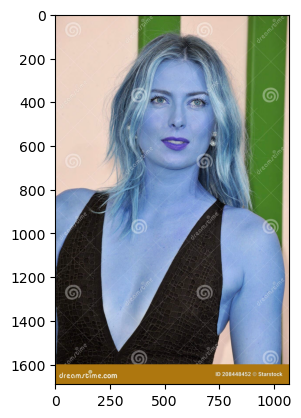

In [22]:
plt.imshow(img)

In [23]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(1690, 1068)

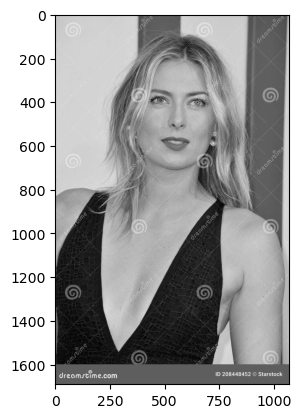

In [24]:
plt.imshow(gray , cmap='gray')

In [25]:
face_cascade = cv2.CascadeClassifier("D:\SportsPersonClassifier\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:\SportsPersonClassifier\model\opencv\haarcascades\haarcascade_eye_tree_eyeglasses.xml")
faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
faces

array([[331, 212, 470, 470]])

In [26]:
(x,y,w,h) = faces[0]
x,y,w,h

(331, 212, 470, 470)

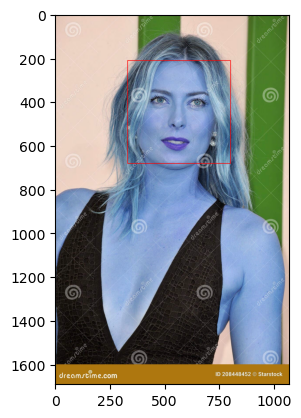

In [27]:
face_img=cv2.rectangle(img , (x,y) , (x+w,y+h) , (255,0,0) , 2)
plt.imshow(face_img)

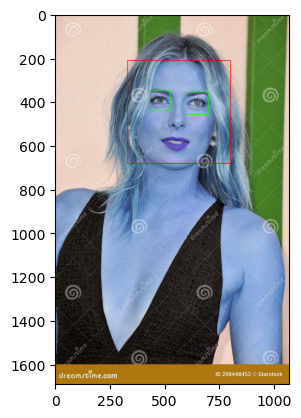

In [28]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img , (x,y) , (x+w,y+h) , (255,0,0) , 2)
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color , (ex,ey) , (ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img , cmap = 'gray')
plt.show()

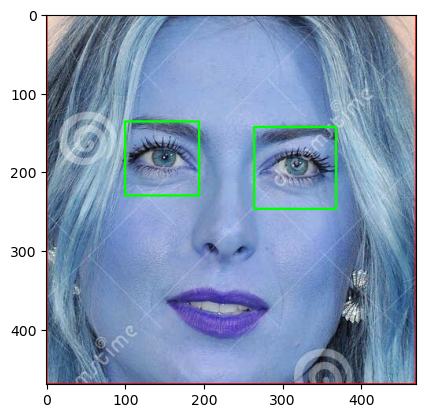

In [29]:
plt.imshow(roi_color , cmap='gray')

In [30]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img , (x,y) , (x+w,y+h) , (255,0,0) , 2)
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = face_img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

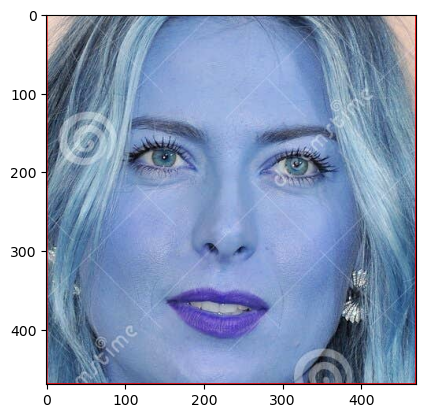

In [31]:
cropped_image = get_cropped_image_if_2_eyes("D:/SportsPersonClassifier/model/test_images/maria-sharapova-maria-sharapova-los-angeles-premiere-battle-sexes-held-regency-village-theatre-westwood-208448452.jpg")
plt.imshow(cropped_image)

In [32]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("D:/SportsPersonClassifier/model/test_images/maria-sharapova-retirement-1582727089.jpg")
cropped_image_no_2_eyes

In [33]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['./dataset/lionel messi - Google Search',
 './dataset/maria sharapova - Google Search',
 './dataset/roger federer - Google Search',
 './dataset/serena williams - Google Search',
 './dataset/virat kohli - Google Search']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [61]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1].split(' - ')[-2].replace(" ", "_")
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)
    for entry in os.scandir(img_dir):
        #x = entry.path.replace("\" ,"/")                               
        x = entry.path.replace("\\" , "/")
        #print(x)
        roi_color = get_cropped_image_if_2_eyes(x)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image in folder : " , cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

lionel_messi
Generating cropped image in folder :  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped image in folder :  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped image in folder :  ./dataset/cropped/roger_federer
serena_williams
Generating cropped image in folder :  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped image in folder :  ./dataset/cropped/virat_kohli


In [62]:
'''celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]#.split(' - ')[-2].replace(" ", "_")
    file_list = []
    for entry in os.scandir(img_dir):
        x = entry.path.replace("\\" , "/")
        file_list.append(x)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict'''

'celebrity_file_names_dict = {}\nfor img_dir in cropped_image_dirs:\n    celebrity_name = img_dir.split(\'/\')[-1]#.split(\' - \')[-2].replace(" ", "_")\n    file_list = []\n    for entry in os.scandir(img_dir):\n        x = entry.path.replace("\\" , "/")\n        file_list.append(x)\n    celebrity_file_names_dict[celebrity_name] = file_list\ncelebrity_file_names_dict'

In [63]:
import numpy as np
import pywt
import cv2

def w2d(img , mode='haar' , level=1):
    imArray = img
    
    #Datatype conversions
    #Convert to greyScale
    
    imArray = cv2.cvtColor(imArray , cv2.COLOR_RGB2GRAY)
    
    #Convert to float
    
    imArray = np.float32(imArray)
    imArray /= 255;
    
    #Compute coeff
    coeffs = pywt.wavedec2(imArray , mode , level = level)
    
    #Process coeff
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H , mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

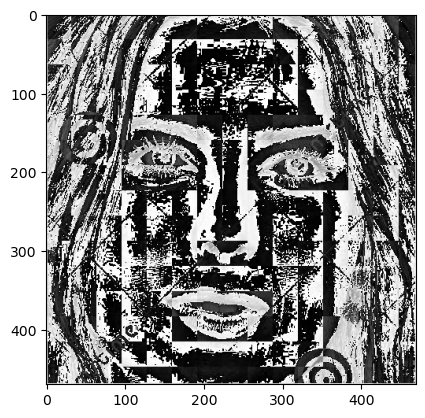

In [64]:
im_har = w2d(cropped_image , 'db1' , 5)
plt.imshow(im_har , cmap = 'gray')

In [65]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [67]:
x= []
y=[]
for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img , (32,32))
        img_har = w2d(img , 'db1' , 5)
        scaled_img_har = cv2.resize(img_har , (32 , 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3 , 1) , scaled_img_har.reshape(32*32 , 1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [69]:
len(x)

146

In [70]:
x = np.array(x).reshape(len(x) , 4096).astype(float)
x.shape

(146, 4096)

In [100]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [122]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 0)

pipe = Pipeline([('scaler' , StandardScaler()) , ('svc' , SVC(kernel = 'rbf' , C = 10))])
pipe.fit(x_train , y_train)
pipe.score(x_test , y_test)

0.7297297297297297

In [123]:
print(classification_report(y_test , pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.69      0.92      0.79        12
           2       1.00      0.25      0.40         4
           3       0.71      0.83      0.77         6
           4       0.67      0.67      0.67         6

    accuracy                           0.73        37
   macro avg       0.79      0.67      0.67        37
weighted avg       0.76      0.73      0.71        37



In [124]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [125]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.770130,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.679221,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.823810,{'logisticregression__C': 1}


In [128]:
best_estimators['svm'].score(x_test , y_test)

0.7837837837837838

In [129]:
best_clf = best_estimators['svm']


In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 6,  1,  0,  1,  1],
       [ 0, 12,  0,  0,  0],
       [ 0,  1,  1,  2,  0],
       [ 0,  0,  0,  6,  0],
       [ 1,  0,  0,  1,  4]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

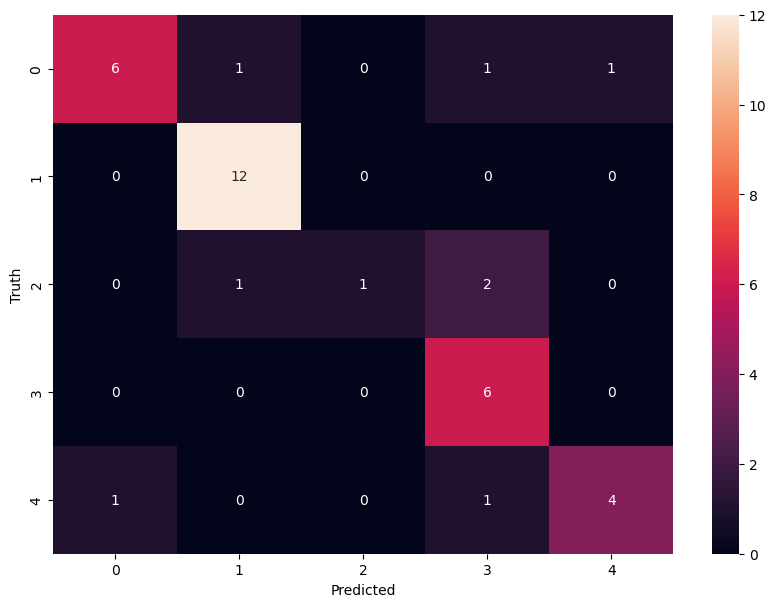

In [132]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [133]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [135]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'D:/SportsPersonClassifier/model/saved_model.pkl') 

['D:/SportsPersonClassifier/model/saved_model.pkl']

In [136]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))